In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys
sys.path.append("Fall 2024")


import kmax as kx
import utility as util
from hierarchy import *
import z_solver as zs

import numpy as np
from scipy.stats import linregress




#  the distribution of the path segments lengths on a tree


In [7]:
# Define
lam = 0.7
offspring_dist = lambda: np.random.poisson(lam)
edge_dist = lambda: np.random.uniform(0, 1)

segment_lengths = []
num_samples = 100000




In [8]:
for _ in range(num_samples):
    tree = nx.Graph(GWBP(dist=offspring_dist, MAXLEVEL=10))
    
    for u, v in tree.edges():
        tree[u][v]['weight'] = edge_dist()

    if tree.number_of_nodes() == 1:
        continue


    path_set, _, _, _, _ = util.path_cover(tree, root=0, return_tuples=False)

    # Make a graph of the optimal path
    G_opt = nx.Graph()
    G_opt.add_edges_from(path_set)
    
    # find the comp w the root
    if 0 in G_opt:
        component = nx.node_connected_component(G_opt, 0)
        sub_edges = [(u, v) for u, v in G_opt.edges() if u in component and v in component]
        seg_len = sum(tree[u][v]['weight'] for u, v in sub_edges)
        segment_lengths.append(seg_len)

print(f"Total segments extracted: {len(segment_lengths)}")




Total segments extracted: 48764


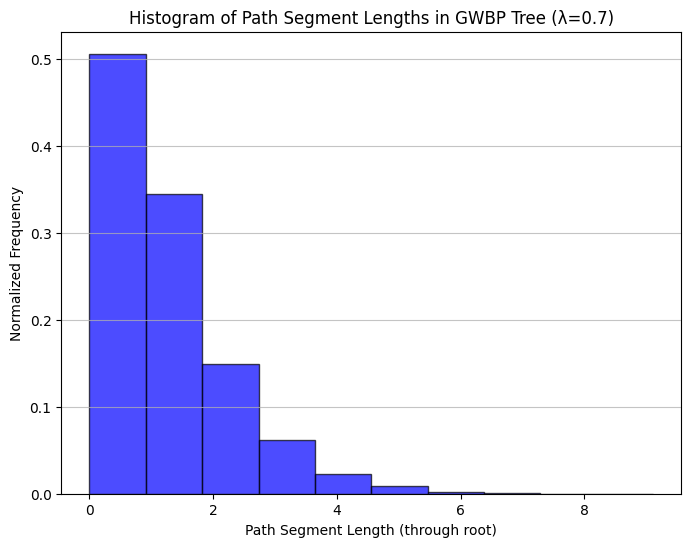

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(segment_lengths, bins=10, color="blue", edgecolor="black", alpha=0.7, density=True)
plt.xlabel("Path Segment Length (through root)")
plt.ylabel("Normalized Frequency")
plt.title(f"Histogram of Path Segment Lengths in GWBP Tree (λ={lam})")
plt.grid(axis='y', alpha=0.75)
plt.show()


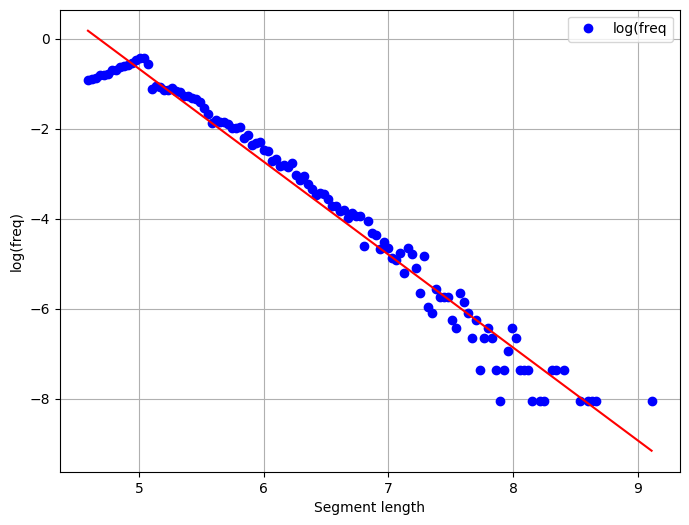

-2.0633221980756566


In [10]:
#slope should give us the log p + q
lengths = np.array(segment_lengths)
bin_counts, bin_edges = np.histogram(lengths, bins='auto', density=True)
bin_centers = 0.5 * (bin_edges[-1:] + bin_edges[1:])
#avoiding log0
nonzero = bin_counts > 0
log_freq= np.log(bin_counts[nonzero])
x_vals = bin_centers[nonzero]

slope, intercept, r, p, se = linregress(x_vals, log_freq)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, log_freq,'bo', label='log(freq')
plt.plot(x_vals, slope * x_vals + intercept, 'r-') 
plt.xlabel("Segment length")
plt.ylabel("log(freq)")
plt.legend()
plt.grid(True)
plt.show()
print(slope)

